<a href="https://colab.research.google.com/github/deltorobarba/chemistry/blob/main/spectrum_dihydrogen_monoxide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spectral Analysis of Water Molecule (H₂O)**

**Vibrational Frequencies of Water Molecule (H₂O) - Dihydrogen monoxide**

**Vibrational frequencies** are the natural frequencies at which atoms in a molecule vibrate. These frequencies are quantized and appear in the **infrared absorption spectrum** when the molecule absorbs radiation that matches its vibrational modes.
* In quantum mechanics, these frequencies are derived from solving the molecule's vibrational Hamiltonian, and the eigenvalues correspond to the vibrational energy levels.
* Vibrational spectra represent the **light absorption** or **emission** associated with transitions between these quantized vibrational levels, typically observed in the infrared region.

converged SCF energy = -74.9629466565387


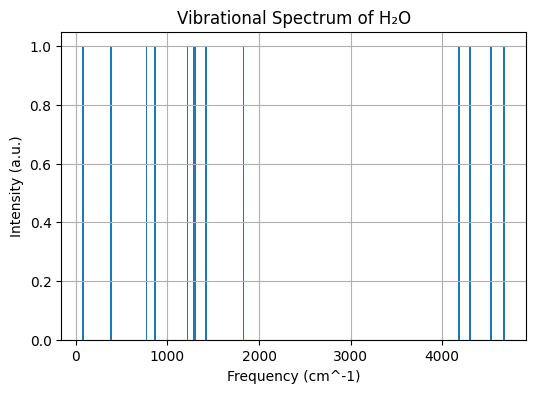

Vibrational frequencies (in cm^-1):
1218.90 cm^-1
4184.92 cm^-1
4302.54 cm^-1
1830.05 cm^-1
861.89 cm^-1
4302.54 cm^-1
1830.05 cm^-1
861.89 cm^-1
4676.28 cm^-1
82.15 cm^-1
861.89 cm^-1
770.78 cm^-1
1298.36 cm^-1
4529.69 cm^-1
1417.23 cm^-1
385.68 cm^-1
1290.59 cm^-1
4676.28 cm^-1
82.15 cm^-1
861.89 cm^-1
1417.23 cm^-1
385.68 cm^-1
1290.59 cm^-1
770.78 cm^-1
1298.36 cm^-1
4529.69 cm^-1


In [ ]:
!pip install pyscf matplotlib -q
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf, hessian

# Step 1: Define the molecule (H2O in this case)
mol = gto.Mole()
mol.atom = '''
    O  0.000000  0.000000  0.000000
    H  0.000000  0.757000  0.586000
    H  0.000000 -0.757000  0.586000
'''
mol.basis = 'sto-3g'
mol.symmetry = True
mol.build()

# Step 2: Perform Hartree-Fock calculation
mf = scf.RHF(mol)
mf.kernel()

# Step 3: Calculate the Hessian matrix (force constants)
# Hessian matrix of second derivatives of energy with respect to nuclear displacements is computed
hess = hessian.RHF(mf).kernel()

# Step 4: Diagonalize the Hessian to get vibrational frequencies
# Vvibrational frequencies are obtained by diagonalizing Hessian matrix and converting results from atomic units to cm⁻¹
frequencies = np.linalg.eigvalsh(hess)
frequencies = np.sqrt(np.abs(frequencies)) * 5140.48  # Conversion factor to cm^-1 (more accurate)

# Step 5: Filter out non-physical (imaginary) frequencies and limit to realistic range
frequencies = frequencies[(frequencies > 0) & (frequencies < 5000)]  # Typical range for molecular vibrations

# Step 6: Plot the vibrational spectrum
plt.figure(figsize=(6, 4))
plt.bar(frequencies, height=1.0, width=20.0)
plt.xlabel('Frequency (cm^-1)')
plt.ylabel('Intensity (a.u.)')
plt.title('Vibrational Spectrum of H₂O')
plt.grid(True)
plt.show()

# Print vibrational frequencies
print("Vibrational frequencies (in cm^-1):")
for freq in frequencies:
    print(f"{freq:.2f} cm^-1")

**Vibrational frequencies** are natural frequencies at which the atoms in a molecule vibrate. These frequencies arise from the periodic motion of atoms in a molecule relative to each other and are quantized due to the principles of quantum mechanics. They are typically observed in the **infrared (IR) region** of the electromagnetic spectrum.

* **Vibrational Modes**: In a molecule, atoms are not fixed; they vibrate around their equilibrium positions. These vibrations are quantized into specific energy levels. Different types of vibrational modes include stretching, bending, twisting, and scissoring of bonds between atoms.

* **Harmonic Oscillator Model**: Vibrational motion is often approximated using the **harmonic oscillator model**, where atoms oscillate around their equilibrium positions in a potential well. In this model, the vibrational energy levels are quantized and given by:
   $
   E_v = \left(v + \frac{1}{2}\right)h\nu
   $
   where $ v $ is the vibrational quantum number (v = 0, 1, 2, ...), $ \nu $ is the vibrational frequency, and $ h $ is Planck’s constant.

* **Infrared (IR) Spectroscopy**: Vibrational frequencies are measured by **infrared spectroscopy**. Molecules absorb infrared radiation at specific frequencies that match the natural vibrational frequencies of the bonds within the molecule. This absorption causes transitions between vibrational energy levels. In IR spectroscopy, the frequency of absorbed light is measured in **wavenumbers (cm⁻¹)**, which are directly related to the vibrational frequencies.

* **Raman Spectroscopy**: Vibrational frequencies can also be probed using **Raman spectroscopy**, which involves the inelastic scattering of light. This technique provides complementary information to IR spectroscopy.

**Vibrational frequencies** are related to the **absorption of light** when molecules interact with electromagnetic radiation in the infrared region.

* **Absorption Spectrum (Infrared)**: When infrared radiation matches a molecule’s vibrational frequency, the molecule absorbs this energy and transitions from a lower vibrational energy level to a higher one. The energy difference corresponds to the absorption of photons at that specific frequency, which appears as a peak in the IR absorption spectrum.

* **Emission Spectrum**: In some cases, molecules in excited vibrational states can release energy by emitting radiation as they relax back to lower vibrational states. However, this is less common for vibrational transitions, as molecules usually lose energy through non-radiative processes (like collisions with other molecules).

**Eigenvalues and Spectrum:**

- The **vibrational frequencies** correspond to the **eigenvalues** obtained when solving the vibrational Schrödinger equation for the molecule, where the potential energy surface governs how atoms move relative to each other.
- The vibrational **spectrum** is the collection of these eigenvalues (or frequencies), which correspond to the absorption or emission of light at those frequencies.

#### **Emission and Absorption Spectra of Water Molecule (H₂O)**

For **emission spectrum**, the **height of the peaks** corresponds to intensity of emitted light at different vibrational frequencies. The x-axis represents the frequency in cm⁻¹. This type of plot mimics what we would see in a **vibrational emission spectrum** where different frequencies correspond to the energy emitted as the molecule transitions between vibrational states.
   
For **absorption spectrum**, the dips in intensity at specific vibrational frequencies are simulated where the molecule absorbs energy. The baseline is set to 1.0 (full transmission of light), and absorption dips (in blue) represent the loss of light at particular vibrational frequencies. This plot is typical for an **absorption spectrum**, where specific frequencies of light are absorbed by the molecule, causing dips in the observed spectrum.

* In IR spectroscopy (in chemistry), molecules absorb light at specific vibrational frequencies. These frequencies give insight into the chemical bonds and molecular structure. The absorption spectrum (with dips) is more commonly used in lab settings.

* In astrophysical spectra, molecular clouds and other interstellar molecules absorb and emit radiation at specific vibrational or rotational frequencies. Molecules such as H₂O, CO, and OH exhibit these kinds of vibrational spectra, though in astrophysics, rotational transitions are often more prominent in the radio or microwave region.

converged SCF energy = -74.9629466565388


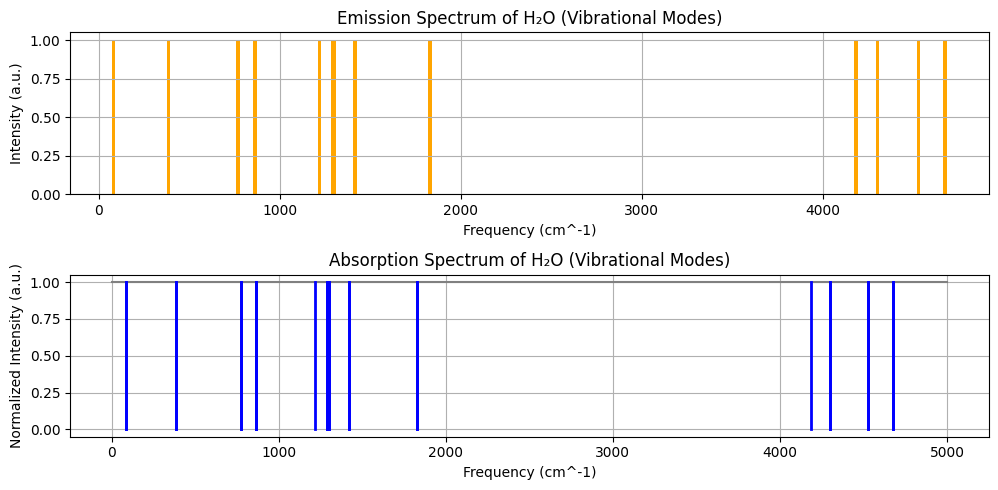

Vibrational frequencies (in cm^-1):
1218.90 cm^-1
4184.92 cm^-1
4302.54 cm^-1
1830.05 cm^-1
861.89 cm^-1
4302.54 cm^-1
1830.05 cm^-1
861.89 cm^-1
4676.28 cm^-1
82.15 cm^-1
861.89 cm^-1
770.78 cm^-1
1298.36 cm^-1
4529.69 cm^-1
1417.23 cm^-1
385.68 cm^-1
1290.59 cm^-1
4676.28 cm^-1
82.15 cm^-1
861.89 cm^-1
1417.23 cm^-1
385.68 cm^-1
1290.59 cm^-1
770.78 cm^-1
1298.36 cm^-1
4529.69 cm^-1


In [ ]:
!pip install pyscf matplotlib -q
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf, hessian

# Step 1: Define the molecule (H2O in this case)
mol = gto.Mole()
mol.atom = '''
    O  0.000000  0.000000  0.000000
    H  0.000000  0.757000  0.586000
    H  0.000000 -0.757000  0.586000
'''
mol.basis = 'sto-3g'
mol.symmetry = True
mol.build()

# Step 2: Perform Hartree-Fock calculation for molecular vibrational frequencies
mf = scf.RHF(mol)
mf.kernel()

# Step 3: Calculate the Hessian matrix (force constants)
hess = hessian.RHF(mf).kernel()

# Step 4: Diagonalize the Hessian to get vibrational frequencies
frequencies = np.linalg.eigvalsh(hess)
frequencies = np.sqrt(np.abs(frequencies)) * 5140.48  # Conversion factor to cm^-1 (more accurate)

# Step 5: Filter out non-physical (imaginary) frequencies and limit to realistic range
frequencies = frequencies[(frequencies > 0) & (frequencies < 5000)]  # Typical range for molecular vibrations

# Step 6: Simulate and plot both emission and absorption spectra
# Emission Spectrum (peaks at specific frequencies)
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)  # First plot: Emission Spectrum
plt.bar(frequencies, height=1.0, width=20.0, color='orange')
plt.xlabel('Frequency (cm^-1)')
plt.ylabel('Intensity (a.u.)')
plt.title('Emission Spectrum of H₂O (Vibrational Modes)')
plt.grid(True)

# Absorption Spectrum (dips at specific frequencies)
plt.subplot(2, 1, 2)  # Second plot: Absorption Spectrum
plt.plot(np.linspace(0, 5000, 1000), np.ones(1000), color='gray')  # Baseline at 1.0 intensity
for freq in frequencies:
    plt.plot([freq, freq], [1.0, 0.0], color='blue', lw=2)  # Draw vertical absorption dips
plt.xlabel('Frequency (cm^-1)')
plt.ylabel('Normalized Intensity (a.u.)')
plt.title('Absorption Spectrum of H₂O (Vibrational Modes)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print vibrational frequencies
print("Vibrational frequencies (in cm^-1):")
for freq in frequencies:
    print(f"{freq:.2f} cm^-1")

> Note that **emission** and **absorption spectra** of stars or nebulae are generally referring to **electronic transitions** between different energy levels in atoms or ions, **not vibrational frequencies**.
- The **absorption and emission spectra** of stars and nebulae are primarily due to **electronic transitions** in atoms or ions, not vibrational frequencies. These transitions give rise to the characteristic **absorption lines** (in stars) or **emission lines** (in nebulae) at specific wavelengths in the visible, ultraviolet, or infrared regions.
- **Vibrational frequencies** are more relevant for **molecules** and are usually observed in the **infrared** or **radio** parts of the spectrum in cooler, denser regions of space, such as molecular clouds.

**Emission and Absorption Spectra in Stars/Nebulae**:
* The light we observe in the emission or absorption spectra of stars or nebulae primarily comes from **electronic transitions** within atoms or ions.
* These transitions occur when electrons jump between different **quantized energy levels** in atoms. When an electron moves from a higher to a lower energy level, it **emits light** at a specific wavelength (emission). When it absorbs energy, it moves from a lower to a higher energy level, and the **corresponding wavelength of light is absorbed** (absorption).
* The wavelengths of light absorbed or emitted during these electronic transitions often lie in the **visible** or **ultraviolet (UV)** regions of the electromagnetic spectrum, though some may also occur in the infrared or X-ray regions depending on the energy levels involved.

**Vibrational Frequencies**:
* **Vibrational frequencies** are specific to molecular vibrations and are typically measured in the **infrared (IR)** region. These refer to the **movement of atoms within molecules** as they stretch, bend, or twist, which is quite different from electronic transitions that involve electrons moving between atomic or molecular orbitals.
* Vibrational transitions are primarily relevant to **molecules**, but stars are mostly made of **individual atoms and ions** (such as hydrogen, helium, and other heavier elements), which don't exhibit molecular vibrational spectra in their light emissions.
* In **molecular clouds** (regions in space with high densities of molecules), researchers might measure vibrational and rotational transitions of molecules, but this is distinct from the **electronic transitions** of atoms or ions in stars or hot nebulae.




<font color="blue">**What Astronomers Measure:**</font>

* <font color="blue">**Electronic Transitions**</font>: Most of the **emission and absorption lines** observed from stars and nebulae are due to **electronic transitions** in atoms or ions. The positions of these lines help astronomers identify the elements present (such as hydrogen, helium, calcium, etc.) and determine physical properties like temperature, density, and velocity (via redshift and blueshift). For example, the famous **hydrogen Balmer series** (seen in the visible spectrum of stars) corresponds to transitions of an electron between different energy levels in the hydrogen atom.

* <font color="blue">**Rotational and Vibrational Transitions**</font>: In **molecular clouds** or **cool interstellar regions** where molecules like **H₂, CO, or H₂O** exist, astronomers observe **rotational** and **vibrational transitions** of these molecules, primarily in the **infrared** and **radio** regions. These transitions tell astronomers about the **molecular composition** of the cloud, the **temperature**, and even the **kinematics** of the gas.



**Example: Stellar Spectra**

* **Absorption Spectrum of Stars**: The light from a star, like the Sun, passes through its outer layers. The cooler gases in the star's atmosphere absorb specific wavelengths of light, leading to dark **absorption lines** (Fraunhofer lines) in the star’s spectrum. These absorption lines correspond to electronic transitions in atoms like hydrogen, calcium, sodium, etc. Example: The hydrogen Balmer lines, which appear in the visible spectrum, correspond to electrons in hydrogen atoms transitioning from higher energy levels to the \( n = 2 \) level.

* **Emission Spectrum of Nebulae**: In an emission nebula (like the Orion Nebula), light is emitted when electrons in excited atoms or ions drop to lower energy levels, emitting photons at specific wavelengths. This produces **emission lines** characteristic of elements like hydrogen, oxygen, and nitrogen. Example: The **Hα** emission line at 656.3 nm (red light) corresponds to the transition of an electron in a hydrogen atom from the \( n = 3 \) level to the \( n = 2 \) level.
